### Figure 4 - Ice Surface Elevation

Ice surface elevation sampled along the centreline of Jakobshavn Isbrae from ArcticDEM 2m strips. 

In [9]:
# IMPORT REQUIRED MODULES 
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import rioxarray as rxr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from datetime import datetime

In [10]:
# Load the CSV file containing the sampled ice surface elevation data
elevation_data = pd.read_csv('R:/JAKOBSHAVN/CODE/github/jakobshavn_isbrae/data/ice_elevation_ArcticDEM/jakobshavn_isbrae_ArcticDEM_2M.csv')
elevation_data.set_index('distance_from_T', inplace=True)

# Select the 'June' profiles for each year
selected_columns = ['20180627', '20190608', '20200507', '20210604', '20220526']
elevation_data_june = elevation_data[selected_columns]

# Specify exclusion ranges (i.e. areas known to be over the ocean) and colours for each profile 
exclusion_ranges_colours = {'20180627': ((0, 2900), '#023047'),
                            '20190608': ((0, 5100), '#219ebc'),
                            '20200507': ((0, 3300), '#a7c957'),
                            '20210604': ((0, 7700), '#e85d04'),
                            '20220526': ((0, 5100), '#a1202f')}

In [11]:
# Calculate the flotation height along the profile, using BedMachine v5
bed_machine_data = pd.read_csv('R:/JAKOBSHAVN/CODE/github/jakobshavn_isbrae/data/ice_elevation_ArcticDEM/BedMachine_v5.csv')
bed_elevation = bed_machine_data['BedMachineGreenland-v5_bed']
rho_ice = 917   # Density of ice in kg/m³
rho_ocean = 1025  # Density of seawater in kg/m³
flotation_height = - bed_elevation * (1 - (rho_ice / rho_ocean)) 
distance_along_profile = bed_machine_data['Distance']

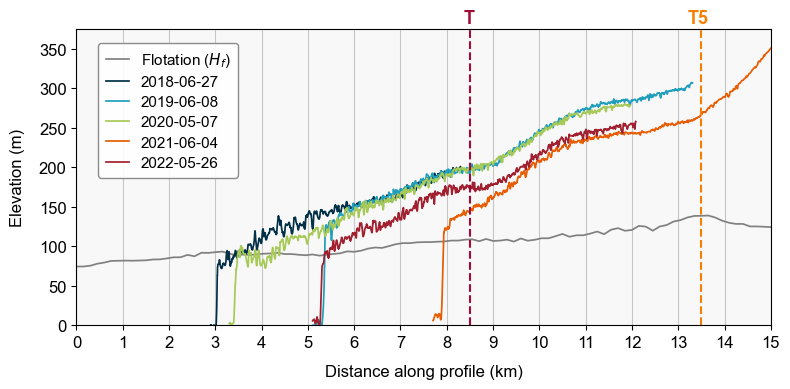

In [ ]:
# Plot the 'June' profiles for each year
plt.rcParams["font.family"] = "Arial"
fig, ax = plt.subplots(figsize=(8, 4))
plt.grid(axis='x', alpha=0.2, linestyle='-', color='black')
plt.xlabel('Distance along profile (km)', fontsize=12, labelpad=10)
plt.ylabel('Elevation (m)', fontsize=12, labelpad=10)
plt.plot(distance_along_profile/1000, flotation_height, color='gray', label=r'Flotation ($H_f$)', linewidth=1.25, linestyle='-')

for column in elevation_data_june.columns:
    if column in exclusion_ranges_colours:
        (start, end), color = exclusion_ranges_colours[column]
        mask = (elevation_data_june.index < start) | (elevation_data_june.index > end)
        filtered_data = elevation_data_june.loc[mask, column]
    else:
        filtered_data = elevation_data_june[column]
        color = 'gray'
    if not filtered_data.empty:
        date_formatted = datetime.strptime(column, '%Y%m%d').strftime('%Y-%m-%d')
        plt.plot(filtered_data.index/1000, filtered_data, label=date_formatted, color=color, linewidth=1.25)

plt.xticks(range(16), fontsize=12)
plt.yticks(fontsize=12)
plt.axvline(x=8.5, color='#a30b37', linestyle='--', ymin=0, ymax=1) # Add vertical line to indicate the location of T 
plt.axvline(x=13.5, color='#f77f00', linestyle='--', ymin=0, ymax=1)  # Add vertical line to indicate the location of T5
ax.annotate("T", xy=(0.558, 1.02), xycoords="axes fraction", fontsize=13, color="#a30b37", weight="bold") # Label T
ax.annotate("T5", xy=(0.88, 1.02), xycoords="axes fraction", fontsize=13, color="#f77f00", weight="bold") # Label T5

plt.xlim(0, 15)
plt.ylim(0, 375)
plt.legend(fontsize=11, loc='upper left', bbox_to_anchor=(0.02, 0.98), framealpha=0.9, edgecolor='gray', fancybox=True, markerscale=2, handlelength=1.5, borderpad=0.5, labelspacing=0.4)
plt.tight_layout()

light_gray = '#f8f8f8'
ax.set_facecolor(light_gray)

#plt.savefig('R:/JAKOBSHAVN/CODE/github/jakobshavn_isbrae/figures/figure_4.png', dpi=300)